In [37]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

## Open file

In [3]:
data = xr.open_dataset("/work/datasets/obs/ERA5/mean_sea_level_pressure/mon/ERA5_mean_sea_level_pressure_mon_0.25x0.25_sfc_1979-2021.nc")

In [4]:
data

<xarray.Dataset>
Dimensions:  (time: 516, lon: 1440, lat: 721)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
Data variables:
    msl      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Wed Apr 13 15:16:22 2022: cdo -f nc4 -z zip cat /work/datas...
    institution:  European Centre for Medium-Range Weather Forecasts
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

## Date selection

In [5]:
firstday = data.sel(time="1979-01-01") # data.sel(time="1979-01-01")

In [6]:
firstarray = firstday.to_array(dim='msl')

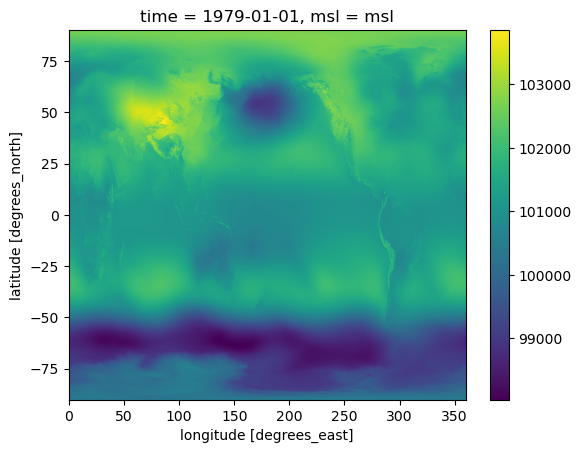

In [7]:
firstarray.plot()

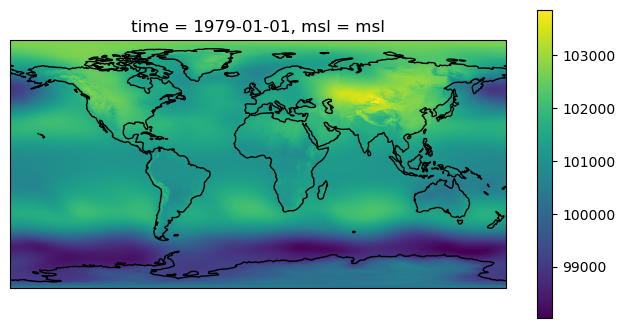

In [68]:
ccrs.PlateCarree()

plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_xlabel('test')
ax.coastlines()
#ax.firstarray.plot()
ax = firstarray.plot() 

In [62]:
data.indexes["time"]

DatetimeIndex(['1979-01-01', '1979-02-01', '1979-03-01', '1979-04-01',
               '1979-05-01', '1979-06-01', '1979-07-01', '1979-08-01',
               '1979-09-01', '1979-10-01',
               ...
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', name='time', length=516, freq=None)

## Coordinates evaluation

In [30]:
lat1 = 36
lon1 = 5.5

lat2 = 64
lon2 = 22

# Conversion to degrees_east

lon1 = 180-lon2
lon2 = 180-lon2

## Single index evaluation

In [31]:
test = firstday.sel(lon=36,lat=5.5)
test2 = firstday.sel(lon=64,lat=22)

In [32]:
test-test2

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    time     datetime64[ns] 1979-01-01
Data variables:
    msl      float32 -784.4

## Time series

In [33]:
prs1 = data.sel(lon=lon1,lat=lat1)
prs2 = data.sel(lon=lon2, lat=lat2)

In [34]:
indx = prs1-prs2

In [35]:
indxarray = indx.to_array(dim='msl')

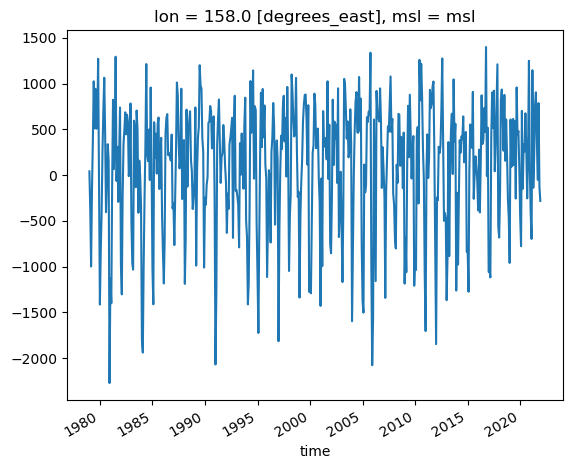

In [36]:
indxarray.plot()

## Three months average time series

## Normalized index